# Capstone project
This notebook is for unit 3, lesson 7 - supervised learning capstone.

I'll be using the predicting house prices data from Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
# data dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scale data
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# models and helpers
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
# load the train and test data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
# concatenate the data frames for data cleaning
df = pd.concat([train_df, test_df], sort=True, ignore_index=True)

# drop the ID column
df = df.drop('Id', axis=1)

print(df.shape)

df.head()

(2919, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### About the columns
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [4]:
# move the target column to be the last one 

# save the values
target_values = df['SalePrice']

# drop the column
df = df.drop('SalePrice', axis=1)

# add it to the end
df['SalePrice'] = target_values

# show df
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,208500.0
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,181500.0
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,223500.0
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,140000.0
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,250000.0


Since the test data is not entirely clean; the two data (test and train) are combined. Then I'll do EDA on the combined data frame, and at the end, before training, the two data frames will be split back. For that, I need to save the index of the test (or train). I'll do it next.

In [5]:
test_idx = len(train_df)
test_idx

1460

## Data cleaning

In [6]:
# start off with a very high level
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

The dataset has many features, but it's not very large. Therefore, my strategy is to try and avoid removing rows, if possible; and later try to remove some features

The above list is a bit intimidating and not very readable. Let's work in smaller chunks. We can check the numeric columns and the objective columns

In [7]:
# numeric data frame
df_numeric = df.select_dtypes(exclude=['object'])

# drop target
df_numeric = df_numeric.drop('SalePrice', axis=1)

# object data frame
df_obj = df.select_dtypes(include=['object'])

# check if we lost any feature
print("total number of features is {}".format(len(df_numeric.columns) + len(df_obj.columns)))

total number of features is 79


In [8]:
# check the obj df first
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 43 columns):
Alley            198 non-null object
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtQual         2838 non-null object
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
Fence            571 non-null object
FireplaceQu      1499 non-null object
Foundation       2919 non-null object
Functional       2917 non-null object
GarageCond       2760 non-null object
GarageFinish     2760 non-null object
GarageQual       2760 non-null object
GarageType       2762 non-null object
Heating          2919

Alley, Fence, MiscFeature and PoolQC are missing many values. Let's dive into it; if the column has more than 90% of null values, the column will be dropped.

In [9]:
# check null percentage
for col in df_obj[['Alley', 'Fence', 'MiscFeature', 'PoolQC']]:
    print(col, ": \t", (df_obj[col].isnull().sum() / len(df)))

Alley : 	 0.9321685508735869
Fence : 	 0.8043850633778691
MiscFeature : 	 0.9640287769784173
PoolQC : 	 0.9965741692360397


In [10]:
# drop Alley, MiscFeature and PoolQC
df = df.drop(['Alley', 'MiscFeature', 'PoolQC'], axis=1)
df.shape

(2919, 77)

In [11]:
# check unique values of Fence
df_obj['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

I'm not sure what each value means, but I will assume that if there is a null value, the house doesn't have a fence. So I'll add a new value 'noFence' to replace the null values

In [12]:
df['Fence'] = df['Fence'].fillna('NoFence')
df['Fence'].value_counts()

NoFence    2348
MnPrv       329
GdPrv       118
GdWo        112
MnWw         12
Name: Fence, dtype: int64

In [13]:
# get the updated object df
df_obj = df.select_dtypes(include=['object'])

Moving on; check the other objective features, see if some of them can be changed to numeric

In [14]:
for col in df_obj:
    print(col, "has these values:\n{}".format(df[col].value_counts()))

BldgType has these values:
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
BsmtCond has these values:
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
BsmtExposure has these values:
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
BsmtFinType1 has these values:
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
BsmtFinType2 has these values:
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
BsmtQual has these values:
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
CentralAir has these values:
Y    2723
N     196
Name: CentralAir, dtype: int64
Condition1 has these values:
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Condition2 has these

It seems that all the object features are "real" objects. Some of them have only two values (binary), but I will not make them 0 and 1, instead, I'll use dummy variables, later in the notebook. 

Continue to deal with the null values

In [15]:
# check if any row is completely null
print("Null rows: ", df_obj.isnull().all().sum())

# total nulls
df_obj.isnull().sum()

Null rows:  0


BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence               0
FireplaceQu      1420
Foundation          0
Functional          2
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
Neighborhood        0
PavedDrive          0
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64

In [16]:
# look into only the columns with null values
tmp = df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'FireplaceQu', 'Functional', 
           'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning', 'MasVnrType', 
          'SaleType', 'Utilities', 'Electrical', 'Exterior1st', 'Exterior2nd']]

for col in tmp.columns:
    print(col, "\n{}".format(tmp[col].value_counts()))

BsmtCond 
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
BsmtExposure 
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
BsmtFinType1 
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
BsmtFinType2 
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
BsmtQual 
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
FireplaceQu 
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Functional 
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
GarageCond 
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64
GarageFinish 
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
GarageQual 
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
Gar

It's hard to know what each value means in all cases. Also, since it's a string, I can't take the average amount. I can replace the null values with the most common one, but it seems not fair if, for example, the most common value is 'excellent.' Therefore, based on the values above (below col #3) I will change the null values to the most basic form; either not excite ('TA' in some columns) or something to present basic type of that feature.

In [17]:
# fill the null values
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('NoBsmt', inplace=True)
df['BsmtFinType2'].fillna('TA', inplace=True)
df['BsmtQual'].fillna('TA', inplace=True)
df['FireplaceQu'].fillna('TA', inplace=True)
df['Functional'].fillna('Basic', inplace=True)
df['GarageCond'].fillna('NoGarage', inplace=True)
df['GarageFinish'].fillna('NoGarage', inplace=True)
df['GarageType'].fillna('NoGarage', inplace=True)
df['GarageQual'].fillna('NoGarage', inplace=True)
df['KitchenQual'].fillna('TA', inplace=True)
df['MSZoning'].fillna('basic', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['SaleType'].fillna('Oth', inplace=True)
df['Utilities'].fillna('None', inplace=True)
df['Electrical'].fillna('Mix', inplace=True)
df['Exterior1st'].fillna('Other', inplace=True)
df['Exterior2nd'].fillna('Other', inplace=True)


# refresh the df_obj
df_obj = df.select_dtypes(include=['object'])

### Numeric columns
Next, cleaning the numeric df. Same to the object features, if a column has more than 90% null values it's gone.
Important to know, some of the numeric columns can be considered as continues (like '1stFlrSF') and some are categorical (such as 'GarageCars'). 

In [18]:
df_numeric.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         1
GarageCars         1
GarageYrBlt      159
GrLivArea          0
HalfBath           0
KitchenAbvGr       0
LotArea            0
LotFrontage      486
LowQualFinSF       0
MSSubClass         0
MasVnrArea        23
MiscVal            0
MoSold             0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        1
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64

In [19]:
# features with null values
tmp = df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars',
         'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']]

tmp.head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF
0,706.0,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,856.0
1,978.0,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,1262.0
2,486.0,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,920.0
3,216.0,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,756.0
4,655.0,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,1145.0


They're not too many features with null values. Since dropping a row is my last option, I'll try first to find a logic to replace the null values. 

I will start looking at the one with the most amount of null values - 'LotFrontage'; then 'GarageYrBlt' and so on.

In [20]:
# looking at maybe related features to LotFrontage
tmp = df[['LotFrontage', 'PavedDrive', 'LotConfig']]

# show the head
tmp.head()

,LotFrontage,PavedDrive,LotConfig
0,65.0,Y,Inside
1,80.0,Y,FR2
2,68.0,Y,Inside
3,60.0,Y,Corner
4,84.0,Y,FR2


In [21]:
# get the rows with na value
tmp = tmp[tmp['LotFrontage'].isna()]

# print the amount of each unique values 
print("When 'LoftFrintage' is null\n\n'PavedDrive' has these values\n{}\n\n"
      "'LotConfig' has these values\n{} ".format(tmp['PavedDrive'].value_counts(), tmp['LotConfig'].value_counts()))

When 'LoftFrintage' is null

'PavedDrive' has these values
Y    460
N     18
P      8
Name: PavedDrive, dtype: int64

'LotConfig' has these values
Inside     271
Corner     104
CulDSac     87
FR2         20
FR3          4
Name: LotConfig, dtype: int64 


From above, Pave drive has the vast majority of yes, so I get much more information from this; however, loft config seems to give some indication that many of the garages (when it's null) are inside or in the corner. Therefore, I will assume that wherever 'LoftFrontage' is invalid, the house doesn't have any linear feet to the street so that it will be replaced with 0.

In [22]:
# replacing null values
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [23]:
# looking at maybe related features to GarageYrBlt
tmp = df[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

tmp.head()

,GarageYrBlt,YearBuilt,YearRemodAdd
0,2003.0,2003,2003
1,1976.0,1976,1976
2,2001.0,2001,2002
3,1998.0,1915,1970
4,2000.0,2000,2000


In [ ]:
# get the rows with na value
tmp = tmp[tmp['GarageYrBlt'].isna()]
tmp.head()

,GarageYrBlt,YearBuilt,YearRemodAdd
39,NaN,1955,1955
48,NaN,1920,2008
78,NaN,1968,1968
88,NaN,1915,1982
89,NaN,1994,1995


When GarageYrBlt is 'NaN' some houses went through a remodel, but some didn't. Because there's not clear cut, as far as I can see, I will assume that the garage wasn't rebuilt, even if the house was. Thus, the NaN value will be replaced with the year built. 

In [ ]:
# replace the NaN value with the year the house was built
idx = list(tmp['GarageYrBlt'].index)
for i in idx:
    df.loc[i, 'GarageYrBlt'] = df.loc[i, 'YearBuilt']

Next, MasVnrArea ("Masonry veneer area in square feet"). This might be a bit harder to replace the null values. There aren't too many of them, but I still don't want to drop them.

The idea for this feature is to check the min and max values, and the distribution. If it seems to follow a normal distribution, the null will be replaced with the average. If not, I'll need to find another way to replace it.

In [ ]:
print ("# of unique values:", df['MasVnrArea'].nunique())

x = df['MasVnrArea'].unique()

print("Min value {}; Max value {}".format(min(x), max(x)))

# of unique values: 444
Min value 0.0; Max value 1600.0


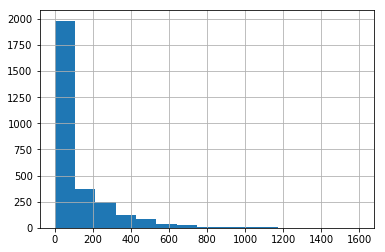

There are 1738 zero values


In [ ]:
# visualize distribution
df['MasVnrArea'].hist(bins=15)
plt.show()
print("There are {} zero values".format((df['MasVnrArea'] == 0).sum()))

The majority of the values are 0; many of them are less the 300. Replacing the nulls with the average or any other similar value (median, etc.) seems irrelevant. Thus, the assumption is that if there is a null value, the missing value will be replaced with 0 - meaning there is not masonry veneer area in this house

In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

The other features have 1 - 2 Nan values; most of them are basement related, which I'll look into all of them together. The other ones are the garage area and garage cars which will follow after.

In [ ]:
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt         0
GrLivArea           0
HalfBath            0
KitchenAbvGr        0
LotArea             0
LotFrontage         0
LowQualFinSF        0
MSSubClass          0
MasVnrArea          0
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
SalePrice        1459
dtype: int64

In [ ]:
# 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2' don't have null values, but here to help to get the picture
tmp = df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 
           'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']]

tmp.head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,BsmtCond,BsmtFinType1,BsmtFinType2
0,706.0,0.0,1.0,0.0,150.0,856.0,TA,GLQ,Unf
1,978.0,0.0,0.0,1.0,284.0,1262.0,TA,ALQ,Unf
2,486.0,0.0,1.0,0.0,434.0,920.0,TA,GLQ,Unf
3,216.0,0.0,1.0,0.0,540.0,756.0,Gd,ALQ,Unf
4,655.0,0.0,1.0,0.0,490.0,1145.0,TA,GLQ,Unf


In [ ]:
# show rows with at least one null value
tmp = tmp[tmp.isnull().any(axis=1)]

tmp.head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,BsmtCond,BsmtFinType1,BsmtFinType2
2120,NaN,NaN,NaN,NaN,NaN,NaN,TA,NoBsmt,TA
2188,0.0,0.0,NaN,NaN,0.0,0.0,TA,NoBsmt,TA


All the null values of these columns are in the same two rows, and the reason is that there is no basement. I assume that the standard for marking no basement for these columns is 0 (like row 2188 with 'BsmtFinSF1'). Therefore, the nulls will be replaced with 0. 

In [ ]:
# replace the Nan values in these columns with 0
values = {'BsmtFinSF1': 0,
         'BsmtFinSF2': 0,
         'BsmtFullBath': 0,
         'BsmtHalfBath': 0,
         'BsmtUnfSF': 0,
         'TotalBsmtSF': 0}

df = df.fillna(value=values)

# show that it worked
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF']].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

In [ ]:
# look into the garage variables
tmp = df[['GarageArea', 'GarageCars', 'GarageYrBlt', 'GarageCond']]

tmp = tmp[tmp.isnull().any(axis=1)]

tmp.head()

,GarageArea,GarageCars,GarageYrBlt,GarageCond
2576,NaN,NaN,1923.0,NoGarage


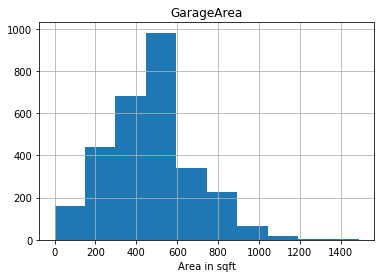

In [ ]:
df['GarageArea'].hist()
plt.title('GarageArea')
plt.xlabel('Area in sqft')
plt.show()

df['GarageCars'].hist(bins=6)
plt.title('GarageCars')
plt.xlabel('How many cars can park')
plt.show()

Similarly to above, there is no garage this is why there are null values. It can be seen that there are several 0 values, so I assume that this is the standard. I'll again replace the missing values with 0.

In [ ]:
# replace the Nan values in these columns with 0
values = {'GarageArea': 0,
         'GarageCars': 0}

df = df.fillna(value=values)

# show that it worked
df[['GarageArea', 'GarageCars']].isnull().sum()

# Data exploration
After cleaning the data, I will try to explore the data a bit further to get a better insight and understanding.
But, first, it's time to separate the training and test sets.

In [ ]:
# train set
df_train = df[:test_idx]
# test set
df_test = df[test_idx:]

print("train set shape {}\ntest test set shape{}\n\ntrain's tail:".format(df_train.shape, df_test.shape))
df_train.tail()

In [ ]:
# reset df_numeric and df_obj to train set
df_numeric = df_train.select_dtypes(exclude=object).copy()

df_obj = df_train.select_dtypes(include=['object']).copy()

Starting with the most important one, the target variable - SalePrice.

In [ ]:
# target variable
y = df_train['SalePrice'].copy()
X = df_train.drop('SalePrice', axis=1).copy()

# histogram of Sale Price
plt.hist(y, bins=30)
plt.title("Sale Price")
plt.xlabel("Cost")
plt.ylabel("number of entries")
plt.show()

In [ ]:
stats.probplot(y, plot=plt)
plt.show()

The histogram tells us that SalePrice is right-skewed, in order to get it to a more normal distribution, the probability plot tells us which transformation needs to be done on it. If it's concave up, log transformation is usually helpful. Let's try it and see if it helps.

If it looks better, I'll save the change.

In [ ]:
# log probability plot of sale price
y_log = np.log(y)
stats.probplot(y_log, plot=plt)
plt.show()

print("The std for y log root is",stats.norm.fit(y_log)[1])

# histogram of Sale Price
plt.hist(y_log, bins=30)
plt.title("Sale Price log transform")
plt.xlabel("(log) Cost")
plt.ylabel("number of entries")
plt.show()

In [ ]:
# save the changed y
df_numeric['SalePrice'] = y_log

In [ ]:
# see the correlations between all the numeric variables
corr = df_numeric.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, linewidths=0.01, center=0)

Most variables don't seem to have too much correlation; which is good. However, some features are numeric but really are categorical. I'll next change them to strings and later to dummy variables

In [ ]:
for col in df_numeric.columns:
    print("col: {}, unique values: {}".format(col,df[col].nunique()))

I will treat
- columns with less than 20 unique values as categorical.
- If the column has 20 to 40 unique values will check into it
- If it has more than 40, then as a continuous variable.

The reason is that categorical variables will need to be transformed into dummy variables, some columns can be argued that are categorical even though they have more than 40 unique values and visa versa, but this is the rule I will follow.

In [ ]:
ctg = []
check = []
cont = []
for col in df_numeric.columns:
    if df[col].nunique() <= 20:
        ctg.append(col)
    elif df[col].nunique() <= 40:
        check.append(col)
    else:
        cont.append(col)

In [ ]:
# histogram plots of the categorical variables (0 to 20)
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=1.1, wspace=0.4)

for i in range(1,len(ctg)+1):
    ax = fig.add_subplot(5, 3, i)
    df_numeric[ctg[i-1]].hist(bins=10)
    plt.title(ctg[i-1])

In [ ]:
print((df_numeric['BsmtHalfBath'] != 0).sum())

print((df_numeric['PoolArea'] != 0).sum())

The vast majority of PoolArea and BsmtHalfBath is 0 which just tells that it doesn't have that. Thus, I will transform it to "HasPool" (yes/ no) and "HasBsmtHalfBath" (yes/ no)

In [ ]:
# remove 'SettingWithCopyWarning' worrning
pd.options.mode.chained_assignment = None

# change the values for PoolArea
df_train['PoolArea'] = np.where(df_train['PoolArea'] > 0, 1, 0)

# change the values for BsmtHalfBath
df_train['BsmtHalfBath'] = np.where(df_train['PoolArea'] > 0, 1, 0)

# change columns' name
df_train.rename(columns={'PoolArea': 'HasPool','BsmtHalfBath': 'HasBsmtHalfBath'}, inplace=True)

df_train[['HasPool', 'HasBsmtHalfBath']].head()

In [ ]:
# plot the features with 20 to 40 unique values
fig = plt.figure(figsize=(9,3))
fig.subplots_adjust(wspace=0.5)

for i in range(1,len(check)+1):
    ax = fig.add_subplot(1, 3, i)
    df_numeric[check[i-1]].hist(bins=10)
    plt.title(check[i-1])

In [ ]:
# since it's mostly 0, check if they have any meaning in terms of the target variable
tmp = df_train[['LowQualFinSF', '3SsnPorch', 'MiscVal', 'SalePrice']]

corr = tmp.corr()
sns.heatmap(corr, linewidths=0.01, center=0,annot=True)

Once again, out of 1460 data, more than 1400 is 0. Also, These features seem to add almost no meaning to the data. They will be removed.

In [ ]:
df_train = df_train.drop(['LowQualFinSF', '3SsnPorch', 'MiscVal'], axis=1)
df_train.shape

make numeric categorical features to objects

In [ ]:
# reset df_numeric
df_numeric = df_train.select_dtypes(exclude=['object'])

# get the categorical ones
obj = []
for i in df_numeric.columns:
    if df_numeric[i].nunique() < 20:
        obj.append(i)


In [ ]:
# change the type
df_train[obj] = df_train[obj].astype(str)

# check that it worked
df_train[obj].dtypes

### moving to the continuous values

In [ ]:
# not consider Sale Price
cont = cont[:-1]

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=1.1, wspace=0.5)


for i in range(1,len(cont)+1):
    ax = fig.add_subplot(6, 3, i)
    plt.scatter(df_numeric[cont[i-1]], y, c='teal')
    plt.title(cont[i-1])

These graphs are not pretty. Many of them have high density in the 0's column. But let's focus first on a few of them with several huge outliers. 

Up until now, I tried to avoid the outliers mainly because when selling a house, it can have a large variety, but also because the dataset is a bit small and I want to keep it as authentic as possible. Yet, a few features seem to have a very few huge outliers in particular. 
- 1stFlrSF 
- BsmtFinSF1
- EnclosedPorch
- GrLivArea
- LotArea
- LotFrontage
- OpenPorchSF
- TotalBsmtSF

In [ ]:
tmp = df_train[['1stFlrSF', 'BsmtFinSF1', 'EnclosedPorch', 'GrLivArea', 'LotArea', 
                'LotFrontage', 'OpenPorchSF', 'TotalBsmtSF', 'SalePrice']]

tmp.describe()

In [ ]:
corr = tmp.corr()
sns.heatmap(corr, linewidths=0.01, center=0,annot=True)

1stFlrSF is highly correlated with TotalBsmtSF (which make sense). Also, 1stFlrSF and GrLivArea are correlated. Maybe, later on, I'll feature engineer these features and combine them (something like 'totalSF' or only 'hasBsmt' set instead of breaking it to several features); but for now, since there aren't too many features that are strongly correlated I'll continue.

I'll remove the very extreme rows

In [ ]:
# remove extremes
df_train = df_train[df_train['1stFlrSF'] < 4000]

df_train = df_train[df_train['BsmtFinSF1'] < 5000]

df_train = df_train[df_train['EnclosedPorch'] < 500]

df_train = df_train[df_train['GrLivArea'] < 4500]

df_train = df_train[df_train['LotArea'] < 150000]

df_train = df_train[df_train['LotFrontage'] < 300]

df_train = df_train[df_train['OpenPorchSF'] < 500]

df_train = df_train[df_train['TotalBsmtSF'] < 6000]

In [ ]:
corr = df_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, linewidths=0.01, center=0, annot=True)

In [ ]:
df_train.shape

Before I continue, I'll make the numeric year features to age to avoid this huge numbers (1872 to 2010), I'll normalize the numeric columns and make the object columns to dummies

In [ ]:
# change the year built and year remodeadd to age
# the rule I used is to get the age is to subtract the max value (2010) and multiply by -1 to avoid negative
df_train['YearBuilt'] = df_numeric['YearBuilt'].apply(lambda x: (x - 2010)  * -1)
df_train['YearRemodAdd'] = df_numeric['YearRemodAdd'].apply(lambda x: (x - 2010)  * -1)
df_train['GarageYrBlt'] = df_numeric['GarageYrBlt'].apply(lambda x: (x - 2010)  * -1)

df_train.rename(columns={'YearBuilt': 'AgeHouse', 
                         'YearRemodAdd': 'AgeRemodAdd',
                         'GarageYrBlt': 'GarageAge'}, inplace=True)

In [ ]:
# reset the sub-dfs
df_numeric = df_train.select_dtypes(exclude='object')
df_numeric = df_numeric.drop('SalePrice', axis=1)

df_obj = df_train.select_dtypes(include='object')

In [ ]:
# normalize numeirc df (0-1)
for col in df_numeric.columns:
    # get min / max
    max_col = df_numeric[col].max()
    min_col = df_numeric[col].min()
    
    # (value - min) / (max - min) replaces the current value
    df_numeric[col] = df_numeric[col].apply(lambda x: (x - min_col) / (max_col - min_col))

df_numeric.head()

In [ ]:
# get dummies for object features
print(df_obj.shape)
df_obj = pd.get_dummies(df_obj)
print(df_obj.shape)

In [ ]:
# save the target feature a side
target = df_train['SalePrice']
# remove df_train from memory to avoid problems I had
del(df_train)

# recreate df_train from the numeric and object dfs 
df_train = pd.concat([df_numeric, df_obj], axis=1)

# add target
df_train['SalePrice'] = target

df_train.head()

## Regroup
We started with two data frames - train and test. They were combined and cleaned. Then we separate them again to avoid any overfitting or change to the test set. 

We continued to explore the features, transform the target variable, removed extreme outliers, and checked correlations. Some graphs seem to have some relationship with the target variable, but all of them have their "character"; many data points at the 0's value/ correlations between themselves, etc. 

For now, I'll have it. Next, the categorical variables will be changed to dummy (which will cause me to have A LOT of columns). Then I will train the model. If it works well, it will make my life a bit easier. Else, I will combine features, drop some less important ones, and train the model again. 

There are 1460 rows and 81 columns. I dropped down to 1450 rows and 74 columns. Let's see what's next. 

# Problem shown below

In [ ]:
# show that it's only dummies and not other values
for i in df_obj.columns:
    print(i, df_obj[i].unique(), "\n")

In [ ]:
# full trainning data
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

reg = LinearRegression()
reg_scores = cross_val_score(reg, X, y, cv=10)

reg_scores

In [ ]:
# only numeric features trainning data (not the ones turned to dummy)
X = df_numeric
y = df_train['SalePrice']

reg = LinearRegression()
reg_scores = cross_val_score(reg, X, y, cv=10)

reg_scores

In [ ]:
# Only the ones turn to dummies
X = df_obj
y = df_train['SalePrice']

reg = LinearRegression()
reg_scores = cross_val_score(reg, X, y, cv=10)

reg_scores

In [ ]:
# thr = int(len(X) / 3)

# X_train = x[:thr]
# X_test = x[thr:]
# y_train = y[:thr]
# y_test = y[thr:]

# DELETE
https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
(results.summary())

# TODO:

- use https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html (above) 
- find important features
- run OLS, Lasso, Ridge, Random forest, boosting 
- remove not important features and run again. 